In [1]:
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, Flatten, BatchNormalization, Dropout, GRU
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import module
import gc
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
countriesOfInterest = {"HK", "JP", 'ZA', 'TN', 'TR', 'GB', 'MX', 'US', 'CO', 'EC', 'AU', 'NZ'}
countriesOfInterest = ["ZA", "EG", "TW", "JP", "DK", "FI", "US", "CA", "AU", "NZ", "BR", "CO"]
#countriesOfInterest = list(countriesOfInterest & {"ZA", "EG", "TW", "JP", "DK", "FI", "US", "CA", "AU", "NZ", "BR", "CO"})

enc = OneHotEncoder()
enc.fit(np.array(countriesOfInterest).reshape(-1, 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [3]:
seconds = 10
samplerate = 10
train_x, train_labels, val_x, val_labels, class_weights = module.getSamples(100, None, 1, 1, seconds, samplerate, countriesOfInterest,
               enc, verbose = 0)
input_shape=(train_x.shape[1], train_x.shape[2])
print("train", np.sum(train_labels, axis = 0))

train [3563. 3691. 3212. 4339. 3233. 3994. 3365. 4942. 3755. 4453. 3145. 4716.]


### Fit model

In [4]:
model = keras.Sequential()
model.add(keras.layers.GaussianNoise(input_shape = input_shape,
                                     stddev = .1))
model.add(BatchNormalization(input_shape = input_shape))

model.add(LSTM(128, 
               input_shape=input_shape, 
               return_sequences = True
              ))
model.add(BatchNormalization())
model.add(LSTM(64, 
               return_sequences = False,
               go_backwards = True
              ))
model.add(BatchNormalization())
model.add(Dense(32, activation= "relu"))
model.add(BatchNormalization())
#model.add(Dense(16, activation= "relu"))
#model.add(BatchNormalization())
model.add(Dense(len(enc.categories_[0]), activation= "softmax"))
adam = keras.optimizers.Adam(lr=0.001, amsgrad = True)
model.compile(loss = "categorical_crossentropy", optimizer= adam, metrics=["acc"])
#del train_x, train_labels, val_x, val_labels, class_weights
gc.collect()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise (GaussianNois (None, 100, 25)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 25)           100       
_________________________________________________________________
lstm (LSTM)                  (None, 100, 128)          78848     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 128)          512       
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense (Dense)                (None, 32)                2

Train on 54000 samples, validate on 10800 samples
Epoch 1/2
54000/54000 [==============================] - 122s 2ms/sample - loss: 2.9002 - acc: 0.0912 - val_loss: 2.4937 - val_acc: 0.0788
Epoch 2/2
54000/54000 [==============================] - 80s 1ms/sample - loss: 2.6442 - acc: 0.1135 - val_loss: 2.4903 - val_acc: 0.0732
Train on 54000 samples, validate on 10800 samples
Epoch 3/4
54000/54000 [==============================] - 94s 2ms/sample - loss: 2.5941 - acc: 0.1136 - val_loss: 2.4808 - val_acc: 0.0962
Epoch 4/4
54000/54000 [==============================] - 78s 1ms/sample - loss: 2.4990 - acc: 0.1363 - val_loss: 2.4770 - val_acc: 0.0993
Train on 54000 samples, validate on 10800 samples
Epoch 5/6
54000/54000 [==============================] - 83s 2ms/sample - loss: 2.5174 - acc: 0.1280 - val_loss: 2.4802 - val_acc: 0.1006
Epoch 6/6
54000/54000 [==============================] - 77s 1ms/sample - loss: 2.4565 - acc: 0.1468 - val_loss: 2.4798 - val_acc: 0.0989
Train on 54000 sample

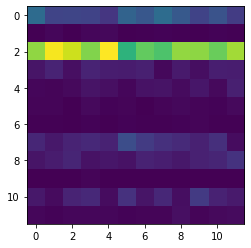

54000/54000 [==============================] - 21s 382us/sample


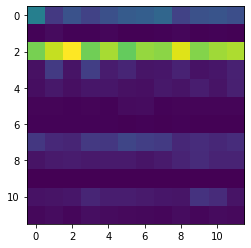

Train on 54000 samples, validate on 10800 samples
Epoch 11/12
54000/54000 [==============================] - 85s 2ms/sample - loss: 2.4289 - acc: 0.1566 - val_loss: 2.4694 - val_acc: 0.1088
Epoch 12/12
54000/54000 [==============================] - 192s 4ms/sample - loss: 2.3890 - acc: 0.1726 - val_loss: 2.4695 - val_acc: 0.1116
Train on 54000 samples, validate on 10800 samples
Epoch 13/14
54000/54000 [==============================] - 202s 4ms/sample - loss: 2.4327 - acc: 0.1544 - val_loss: 2.4745 - val_acc: 0.0977
Epoch 14/14
54000/54000 [==============================] - 183s 3ms/sample - loss: 2.3954 - acc: 0.1702 - val_loss: 2.4788 - val_acc: 0.0936
Train on 54000 samples, validate on 10800 samples
Epoch 15/16
54000/54000 [==============================] - 210s 4ms/sample - loss: 2.4174 - acc: 0.1573 - val_loss: 2.4793 - val_acc: 0.1029
Epoch 16/16
54000/54000 [==============================] - 184s 3ms/sample - loss: 2.3793 - acc: 0.1736 - val_loss: 2.4850 - val_acc: 0.1010
Train

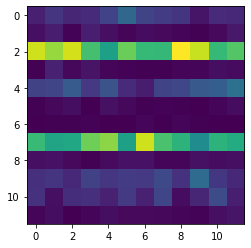

54000/54000 [==============================] - 20s 375us/sample


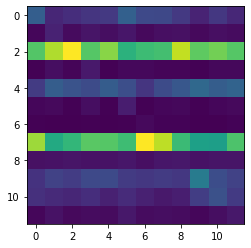

Train on 54000 samples, validate on 10800 samples
Epoch 21/22
54000/54000 [==============================] - 149s 3ms/sample - loss: 2.4042 - acc: 0.1645 - val_loss: 2.4830 - val_acc: 0.0965
Epoch 22/22
54000/54000 [==============================] - 155s 3ms/sample - loss: 2.3673 - acc: 0.1824 - val_loss: 2.4860 - val_acc: 0.1008
Train on 54000 samples, validate on 10800 samples
Epoch 23/24
54000/54000 [==============================] - 283s 5ms/sample - loss: 2.3908 - acc: 0.1736 - val_loss: 2.4872 - val_acc: 0.0910
Epoch 24/24
54000/54000 [==============================] - 137s 3ms/sample - loss: 2.3556 - acc: 0.1866 - val_loss: 2.4846 - val_acc: 0.0982
Train on 54000 samples, validate on 10800 samples
Epoch 25/26
54000/54000 [==============================] - 309s 6ms/sample - loss: 2.3935 - acc: 0.1672 - val_loss: 2.4651 - val_acc: 0.1091
Epoch 26/26
54000/54000 [==============================] - 173s 3ms/sample - loss: 2.3596 - acc: 0.1818 - val_loss: 2.4626 - val_acc: 0.1157
Trai

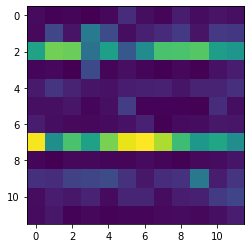

54000/54000 [==============================] - 20s 375us/sample


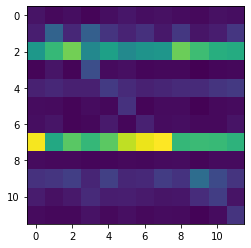

Train on 54000 samples, validate on 10800 samples
Epoch 31/32
54000/54000 [==============================] - 226s 4ms/sample - loss: 2.3650 - acc: 0.1823 - val_loss: 2.4473 - val_acc: 0.1307
Epoch 32/32
54000/54000 [==============================] - 164s 3ms/sample - loss: 2.3326 - acc: 0.1956 - val_loss: 2.4342 - val_acc: 0.1436
Train on 54000 samples, validate on 10800 samples
Epoch 33/34
54000/54000 [==============================] - 89s 2ms/sample - loss: 2.3770 - acc: 0.1787 - val_loss: 2.4493 - val_acc: 0.1365
Epoch 34/34
54000/54000 [==============================] - 78s 1ms/sample - loss: 2.3392 - acc: 0.1936 - val_loss: 2.4732 - val_acc: 0.1244
Train on 54000 samples, validate on 10800 samples
Epoch 35/36
54000/54000 [==============================] - 83s 2ms/sample - loss: 2.3474 - acc: 0.1888 - val_loss: 2.4393 - val_acc: 0.1534
Epoch 36/36
54000/54000 [==============================] - 81s 1ms/sample - loss: 2.3069 - acc: 0.2081 - val_loss: 2.4028 - val_acc: 0.1644
Train on

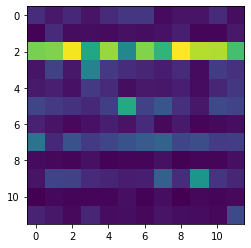

54000/54000 [==============================] - 20s 377us/sample


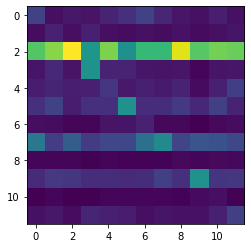

Train on 54000 samples, validate on 10800 samples
Epoch 41/42
54000/54000 [==============================] - 91s 2ms/sample - loss: 2.3538 - acc: 0.1896 - val_loss: 2.4278 - val_acc: 0.1502
Epoch 42/42
54000/54000 [==============================] - 77s 1ms/sample - loss: 2.3125 - acc: 0.2048 - val_loss: 2.4416 - val_acc: 0.1485
Train on 54000 samples, validate on 10800 samples
Epoch 43/44
54000/54000 [==============================] - 87s 2ms/sample - loss: 2.3445 - acc: 0.1883 - val_loss: 2.4343 - val_acc: 0.1391
Epoch 44/44
54000/54000 [==============================] - 78s 1ms/sample - loss: 2.3036 - acc: 0.2093 - val_loss: 2.4275 - val_acc: 0.1345
Train on 54000 samples, validate on 10800 samples
Epoch 45/46
54000/54000 [==============================] - 87s 2ms/sample - loss: 2.3450 - acc: 0.1927 - val_loss: 2.3958 - val_acc: 0.1556
Epoch 46/46
54000/54000 [==============================] - 78s 1ms/sample - loss: 2.3044 - acc: 0.2103 - val_loss: 2.4163 - val_acc: 0.1480
Train on 5

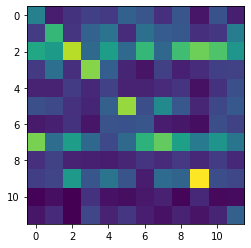

54000/54000 [==============================] - 21s 383us/sample


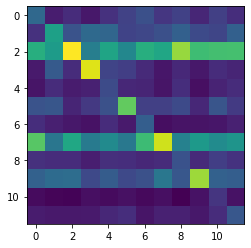

Train on 54000 samples, validate on 10800 samples
Epoch 51/52
54000/54000 [==============================] - 92s 2ms/sample - loss: 2.3325 - acc: 0.1959 - val_loss: 2.3680 - val_acc: 0.1786
Epoch 52/52
54000/54000 [==============================] - 80s 1ms/sample - loss: 2.2965 - acc: 0.2114 - val_loss: 2.3398 - val_acc: 0.1956
Train on 54000 samples, validate on 10800 samples
Epoch 53/54
54000/54000 [==============================] - 83s 2ms/sample - loss: 2.3349 - acc: 0.1964 - val_loss: 2.4011 - val_acc: 0.1725
Epoch 54/54
54000/54000 [==============================] - 79s 1ms/sample - loss: 2.2950 - acc: 0.2125 - val_loss: 2.4000 - val_acc: 0.1743
Train on 54000 samples, validate on 10800 samples
Epoch 55/56
54000/54000 [==============================] - 94s 2ms/sample - loss: 2.3256 - acc: 0.1992 - val_loss: 2.3700 - val_acc: 0.1706
Epoch 56/56
54000/54000 [==============================] - 78s 1ms/sample - loss: 2.2890 - acc: 0.2122 - val_loss: 2.3692 - val_acc: 0.1681
Train on 5

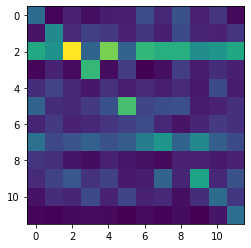

54000/54000 [==============================] - 20s 379us/sample


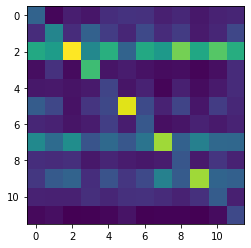

Train on 54000 samples, validate on 10800 samples
Epoch 61/62
54000/54000 [==============================] - 86s 2ms/sample - loss: 2.3054 - acc: 0.2051 - val_loss: 2.3681 - val_acc: 0.1764
Epoch 62/62
54000/54000 [==============================] - 77s 1ms/sample - loss: 2.2624 - acc: 0.2260 - val_loss: 2.3694 - val_acc: 0.1720
Train on 54000 samples, validate on 10800 samples
Epoch 63/64
54000/54000 [==============================] - 86s 2ms/sample - loss: 2.3116 - acc: 0.2064 - val_loss: 2.3549 - val_acc: 0.1945
Epoch 64/64
54000/54000 [==============================] - 80s 1ms/sample - loss: 2.2706 - acc: 0.2256 - val_loss: 2.3463 - val_acc: 0.1881
Train on 54000 samples, validate on 10800 samples
Epoch 65/66
54000/54000 [==============================] - 89s 2ms/sample - loss: 2.3207 - acc: 0.2013 - val_loss: 2.3351 - val_acc: 0.1994
Epoch 66/66
54000/54000 [==============================] - 78s 1ms/sample - loss: 2.2804 - acc: 0.2218 - val_loss: 2.3381 - val_acc: 0.2017
Train on 5

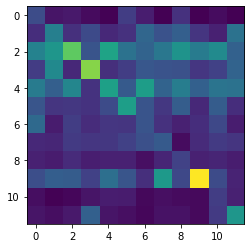

54000/54000 [==============================] - 21s 384us/sample


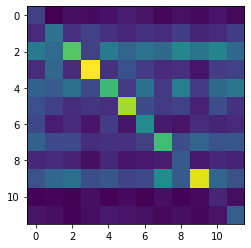

Train on 54000 samples, validate on 10800 samples
Epoch 71/72
54000/54000 [==============================] - 82s 2ms/sample - loss: 2.2749 - acc: 0.2214 - val_loss: 2.3699 - val_acc: 0.1726
Epoch 72/72
54000/54000 [==============================] - 78s 1ms/sample - loss: 2.2313 - acc: 0.2388 - val_loss: 2.3761 - val_acc: 0.1724
Train on 54000 samples, validate on 10800 samples
Epoch 73/74
54000/54000 [==============================] - 83s 2ms/sample - loss: 2.2934 - acc: 0.2106 - val_loss: 2.3758 - val_acc: 0.1756
Epoch 74/74
54000/54000 [==============================] - 80s 1ms/sample - loss: 2.2561 - acc: 0.2261 - val_loss: 2.3852 - val_acc: 0.1740
Train on 54000 samples, validate on 10800 samples
Epoch 75/76
54000/54000 [==============================] - 85s 2ms/sample - loss: 2.2968 - acc: 0.2151 - val_loss: 2.3214 - val_acc: 0.1959
Epoch 76/76
54000/54000 [==============================] - 78s 1ms/sample - loss: 2.2556 - acc: 0.2304 - val_loss: 2.3353 - val_acc: 0.1937
Train on 5

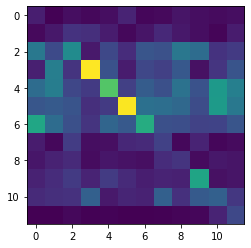

54000/54000 [==============================] - 21s 390us/sample


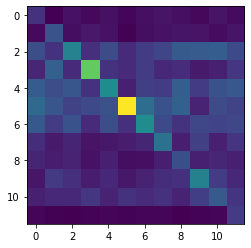

Train on 54000 samples, validate on 10800 samples
Epoch 81/82
54000/54000 [==============================] - 86s 2ms/sample - loss: 2.2758 - acc: 0.2229 - val_loss: 2.3130 - val_acc: 0.2150
Epoch 82/82
54000/54000 [==============================] - 81s 2ms/sample - loss: 2.2316 - acc: 0.2371 - val_loss: 2.3134 - val_acc: 0.2005
Train on 54000 samples, validate on 10800 samples
Epoch 83/84
54000/54000 [==============================] - 86s 2ms/sample - loss: 2.3008 - acc: 0.2136 - val_loss: 2.3757 - val_acc: 0.1674
Epoch 84/84
54000/54000 [==============================] - 82s 2ms/sample - loss: 2.2548 - acc: 0.2322 - val_loss: 2.3566 - val_acc: 0.1791
Train on 54000 samples, validate on 10800 samples
Epoch 85/86
54000/54000 [==============================] - 90s 2ms/sample - loss: 2.2764 - acc: 0.2202 - val_loss: 2.2943 - val_acc: 0.2061
Epoch 86/86
54000/54000 [==============================] - 83s 2ms/sample - loss: 2.2336 - acc: 0.2385 - val_loss: 2.2981 - val_acc: 0.2139
Train on 5

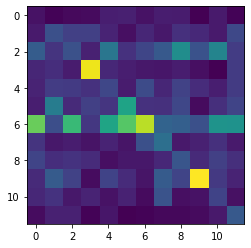

54000/54000 [==============================] - 20s 378us/sample


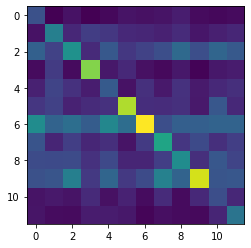

Train on 54000 samples, validate on 10800 samples
Epoch 91/92
54000/54000 [==============================] - 90s 2ms/sample - loss: 2.2911 - acc: 0.2178 - val_loss: 2.3431 - val_acc: 0.1769
Epoch 92/92
54000/54000 [==============================] - 101s 2ms/sample - loss: 2.2451 - acc: 0.2349 - val_loss: 2.3465 - val_acc: 0.1750
Train on 54000 samples, validate on 10800 samples
Epoch 93/94
54000/54000 [==============================] - 200s 4ms/sample - loss: 2.2883 - acc: 0.2151 - val_loss: 2.3685 - val_acc: 0.1833
Epoch 94/94
54000/54000 [==============================] - 78s 1ms/sample - loss: 2.2455 - acc: 0.2308 - val_loss: 2.3639 - val_acc: 0.1867
Train on 54000 samples, validate on 10800 samples
Epoch 95/96
54000/54000 [==============================] - 87s 2ms/sample - loss: 2.2732 - acc: 0.2215 - val_loss: 2.3767 - val_acc: 0.1748
Epoch 96/96
54000/54000 [==============================] - 78s 1ms/sample - loss: 2.2243 - acc: 0.2426 - val_loss: 2.3788 - val_acc: 0.1781
Train on

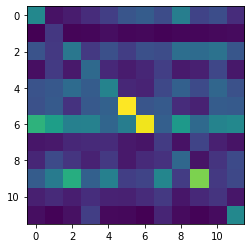

54000/54000 [==============================] - 20s 376us/sample


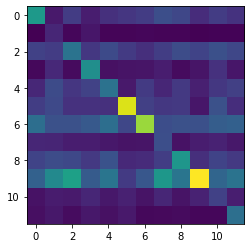

In [5]:
#add recurrent dropout to add noise to duration
desc = "128_64_32_16_try2"
log_dir = os.path.join(
    "logs",
    "Overfit",
    desc
)
model_dir = os.path.join(
    "pickle",
    "save"
)

train_n = 150
sample_n = train_n*30
val_n = 30
valsample_n = val_n *30
iterations = 50
epochs = 2
learn_rate = 0.001
batch_size = 4096 * 4
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model = module.train(iterations, learn_rate, train_n, sample_n, val_n, valsample_n, seconds, samplerate,
                countriesOfInterest, enc, epochs, tensorboard_callback, model_dir,
                model, batch_size)

Implement weighted voting tests

In [59]:
import pickle
import pandas as pd
t = "val"
length = seconds * samplerate

(315662, 34)


In [75]:
for country in enc.categories_[0]:
    data = pickle.load( open( "Raw Track Data\\" + country + "_" + t + ".p", "rb" ) )
    tracks = data.track_id.unique()
    results = []
    for track in tracks:
        trackFeats = data[data.track_id == track]
        dur = trackFeats.iloc[:,1]
        long = trackFeats.loc[trackFeats.index.repeat(dur * samplerate)].reset_index(drop = True)
        long = long.sort_values(by = ["start"])
        long = long.iloc[:, 5:30]

        indices = np.arange(0, long.shape[0], length)
        partition = np.split(np.array(long), indices)
        samples = []
        for i in partition:
            if i.shape[0] == length:
                samples = samples + [i]
        samples = np.stack(samples)
        results = results + [enc.inverse_transform(np.sum(model.predict(samples), axis = 0).reshape(1,-1))[0][0]]
    print(country)
    print(sum(pd.Series(results) == "US") / len(results))

AU
0.005780346820809248
BR
0.027624309392265192
CA
0.01984126984126984
CO
0.0707070707070707
DK
0.01592920353982301
EG
0.007751937984496124
FI
0.011904761904761904
JP
0.05912596401028278
NZ
0.009259259259259259
TW
0.0378619153674833
US
0.05699481865284974
ZA
0.037142857142857144
